In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def H(a,U):
    
    ham = 0
    
    for i in range(len(U)-1):
        
        ham = ham + (U[i+1]-U[i])**2
        
    return ham/a

def P(a,U):
    return np.exp(-H(a,U))

In [3]:
def MH(a,N,du,Ns):
    
    U_s = np.ones((Ns,N))
    
    # scale up since O(u) >> O(H)
    U_0 = 100*np.random.random(N)
    
    for n in range(Ns):
        
        U_0[0] = 0
        U_0[N-1] = 0
        
        x = np.random.randint(1,N-1)

        r = np.random.uniform(-1,1)

        U_new = U_0

        U_new[x] = U_0[x] + r*du

        dH = H(a,U_new) - H(a,U_0)
    
        dP = np.exp(-dH)

        r_MH = np.random.uniform(0,1)

        if dP>1:
            U_0 = U_new
        
        if dP > r_MH:
            U_0 = U_new
        
        U_s[n,:] = U_0
            
    return U_s

In [6]:
def mag(a,U):
    
    L = a*len(U)
    
    ms = 0
    
    for i in range(len(U)):
        
        ms = ms + U[i]
        
    return ms*a/L

In [7]:
L = 64
N = 64
a = 1
d = 2.
Ns = 1000

U_S = MH(a,N,d,Ns)

Text(0, 0.5, 'Magnetization $m(u)$')

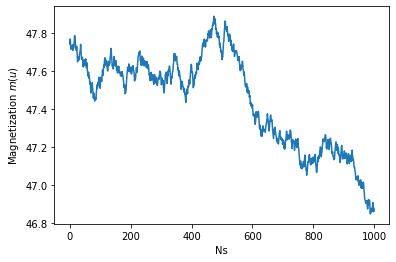

In [17]:
mag_s = np.array([mag(a, U_S[i,:]) for i in range(Ns)])

# plt.plot(U_S[:, 0], mag_s)
plt.plot(mag_s)
plt.xlabel("Ns")
plt.ylabel("Magnetization $m(u)$")


Text(0, 0.5, 'Magnetization Squared $m(u)^2$')

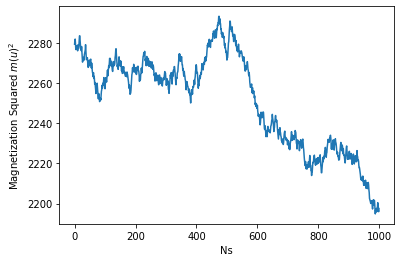

In [19]:
mag_s2 = np.array([mag(a, U_S[i,:])**2 for i in range(Ns)])

# plt.plot(U_S[:, 0], mag_s)
plt.plot(mag_s2)
plt.xlabel("Ns")
plt.ylabel("Magnetization Squared $m(u)^2$")


Text(0, 0.5, 'Hamiltonian $H_a(u)$')

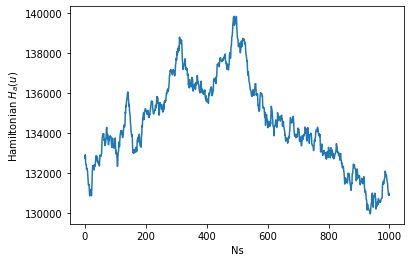

In [18]:
energy_s = np.array([H(a,U_S[i,:]) for i in range(Ns)])

plt.plot(energy_s)
plt.xlabel("Ns")
plt.ylabel("Hamiltonian $H_a(u)$")